In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("./splits/kitti_train.csv", index_col=0)
test = pd.read_csv("./splits/kitti_test.csv", index_col=0)

In [3]:
train.head()

,images,depth
0,2011_10_03/2011_10_03_drive_0042_sync/image_03...,2011_10_03_drive_0042_sync/proj_depth/groundtr...
1,2011_10_03/2011_10_03_drive_0042_sync/image_03...,2011_10_03_drive_0042_sync/proj_depth/groundtr...
2,2011_10_03/2011_10_03_drive_0042_sync/image_03...,2011_10_03_drive_0042_sync/proj_depth/groundtr...
3,2011_10_03/2011_10_03_drive_0042_sync/image_03...,2011_10_03_drive_0042_sync/proj_depth/groundtr...
4,2011_10_03/2011_10_03_drive_0042_sync/image_03...,2011_10_03_drive_0042_sync/proj_depth/groundtr...


In [4]:
test.head()

,images,depth
0,2011_09_26/2011_09_26_drive_0036_sync/image_03...,2011_09_26_drive_0036_sync/proj_depth/groundtr...
1,2011_09_26/2011_09_26_drive_0036_sync/image_03...,2011_09_26_drive_0036_sync/proj_depth/groundtr...
2,2011_09_26/2011_09_26_drive_0036_sync/image_03...,2011_09_26_drive_0036_sync/proj_depth/groundtr...
3,2011_09_26/2011_09_26_drive_0036_sync/image_03...,2011_09_26_drive_0036_sync/proj_depth/groundtr...
4,2011_09_26/2011_09_26_drive_0036_sync/image_03...,2011_09_26_drive_0036_sync/proj_depth/groundtr...


In [5]:
import tensorflow as tf
import numpy as np
import random

def preprocess_color(image, flip=False, shape=None, **kwargs):
    if flip:
        image = tf.image.flip_left_right(image)
        
    if shape:
        h, w, _ = image.shape
        
        max_height = h - shape[0]
        max_width = w - shape[1]
        
        random_height = np.random.randint(0, max_height)
        random_width = np.random.randint(0, max_width)
        
        print(random_height, random_width)
        
        image = image[random_height:random_height+shape[0], random_width:random_width+shape[1]]

    if type(image) is np.ndarray:
        return image
    return image.numpy(), (random_height, random_width)


def load_color_image(filename, **kwargs):
    image = tf.io.read_file(filename)
    image = tf.io.decode_image(image, channels=3, expand_animations=False)
    image = tf.cast(image, tf.float32)
    return image


def load_color(filename, path="/data3/awong/kitti_raw/", flip=False, shape=(256, 640), **kwargs):
    img = load_color_image(path + filename)
    return preprocess_color(img, flip, shape)

2022-05-09 18:20:48.115467: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [6]:
# def preprocess_depth(image, flip=False, shape=None, random_loc=None, **kwargs):
#     if flip:
#         image = tf.image.flip_left_right(image)
        
#     if shape:
#         h, w = shape
#         ran_h, ran_w = random_loc
#         image = image[h:h+ran_h, w:w+ran_w]

#     if type(image) is np.ndarray:
#         return image
#     return image.numpy()

def preprocess_depth(image, flip=False, shape=None, rand_shape=(0,0), **kwargs):
    if flip:
        image = tf.image.flip_left_right(image)
        
    if shape:
        random_height, random_width = rand_shape
        print(random_height, random_width)
        image = image[random_height:random_height+shape[0], random_width:random_width+shape[1]]

    if type(image) is np.ndarray:
        return image
    return image.numpy()


def load_depth_image(filename, **kwargs):
    image = tf.io.read_file(filename)
    image = tf.io.decode_image(image, channels=1, expand_animations=False)
    image = tf.cast(image, tf.float32)
    return image


def load_depth(filename, split="train", path="/data3/awong/kitti/", flip=False, shape=(256, 640), rand_shape=(0,0), **kwargs):
    img = load_depth_image(path + f"{split}/" + filename)

    return preprocess_depth(img, flip, shape, rand_shape)

2022-05-09 18:20:53.073782: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-09 18:20:53.074672: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-09 18:20:55.045381: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:21:00.0 name: Tesla V100-PCIE-32GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2022-05-09 18:20:55.046490: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:22:00.0 name: Tesla V100-PCIE-32GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2022-05-09 18:20:55.048321: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 2 with properties: 
pciBusID: 0000:41:00.0 name: Tesl

80 504
(256, 640, 3)


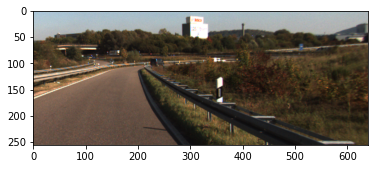

In [7]:
import matplotlib.pyplot as plt

def random_location(image):
    h, w, _ = image.shape

    max_height = h - shape[0]
    max_width = w - shape[1]

    random_height = np.random.randint(0, max_height)
    random_width = np.random.randint(0, max_width)

    print(random_height, random_width)
    
    return random_height, random_width
    
file = train["images"][0]
img, rand_shape = load_color(file)
img = (img - img.min()) / (img.max() - img.min())
print(img.shape)
plt.imshow(img)

80 504
(256, 640, 1)


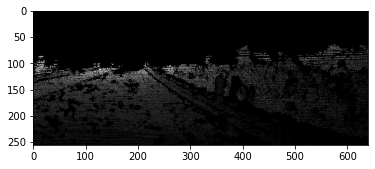

In [8]:
file = train["depth"][0]
img = load_depth(file, rand_shape=rand_shape)
img = (img - img.min()) / (img.max() - img.min())
print(img.shape)
plt.imshow(img, cmap='gray')

In [9]:
import kitti_loader as kloader
import data

train = kloader.generate_dataframe("./splits/kitti_train.csv", "train")
test = kloader.generate_dataframe("./splits/kitti_test.csv", "val")

train_generator = data.DataGenerator(train, datatype="kitti")
test_generator = data.DataGenerator(test, datatype="kitti")

In [10]:
images, depth = test_generator.__getitem__(1)

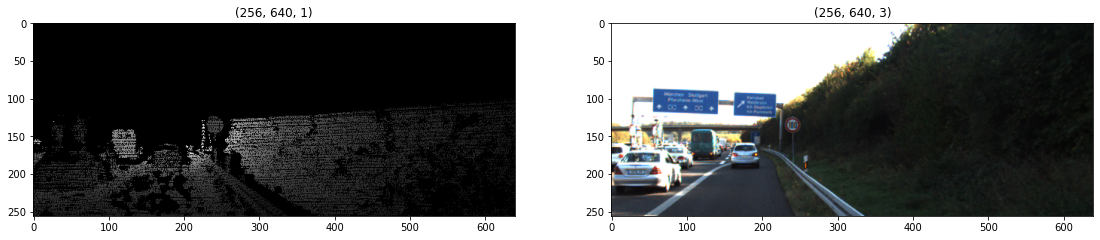

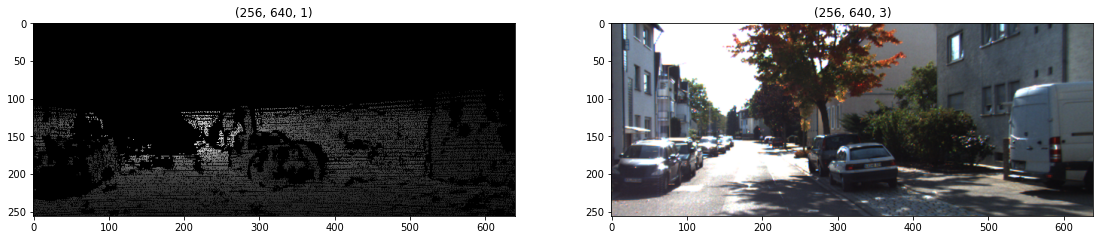

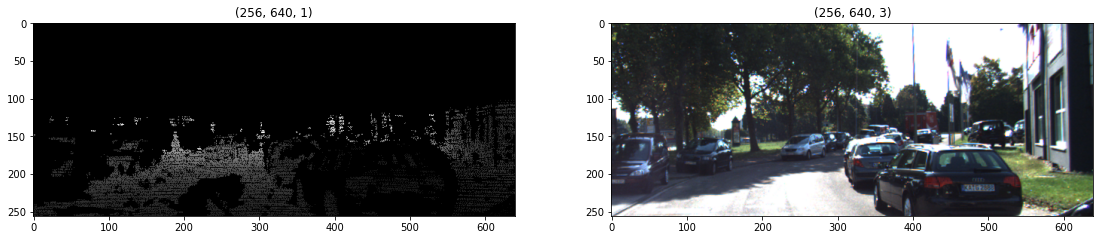

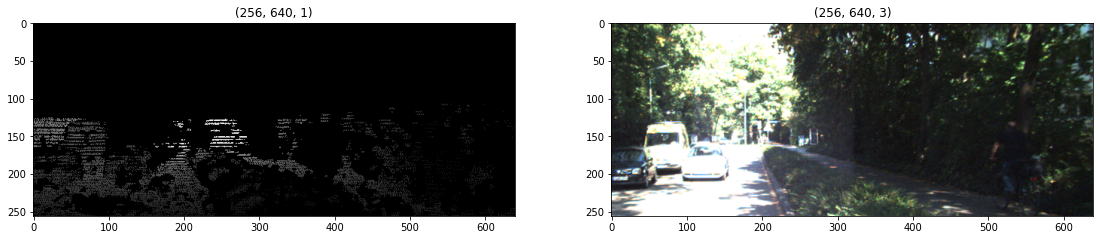

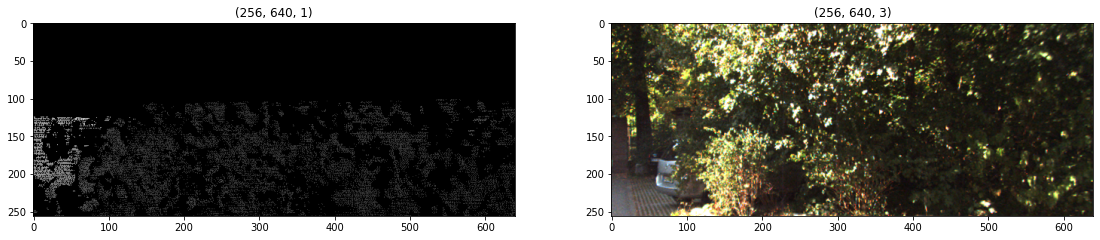

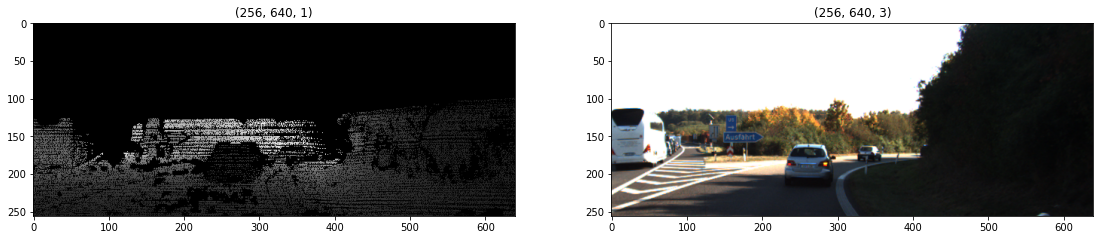

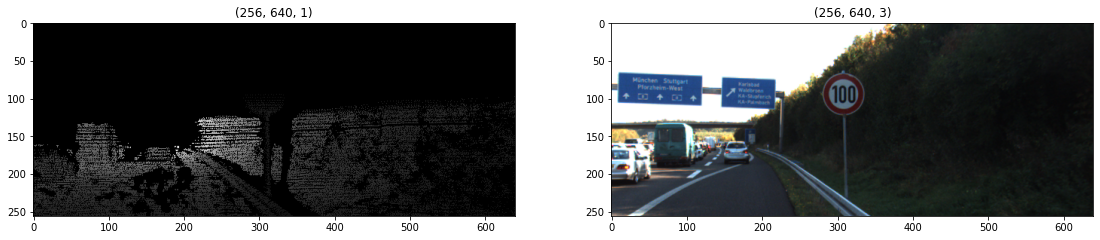

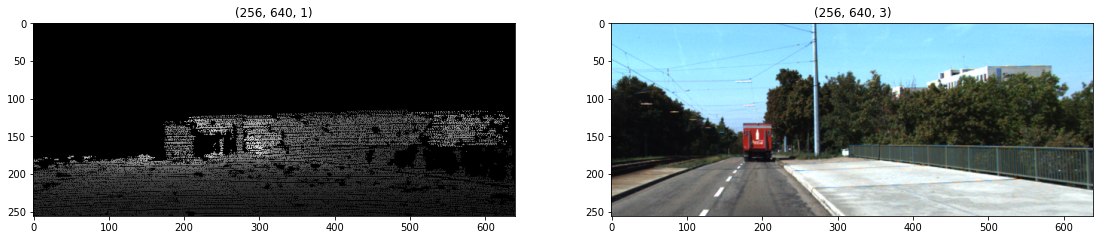

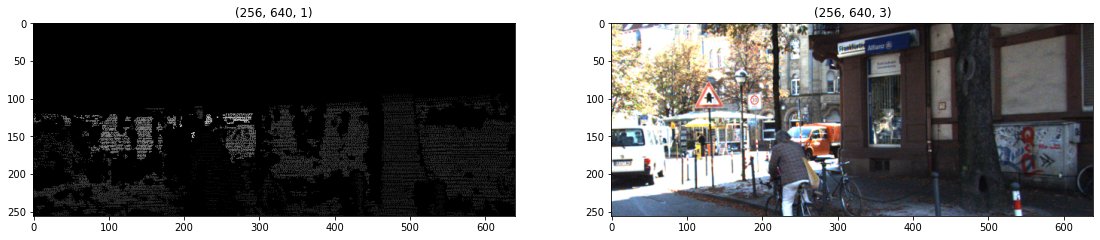

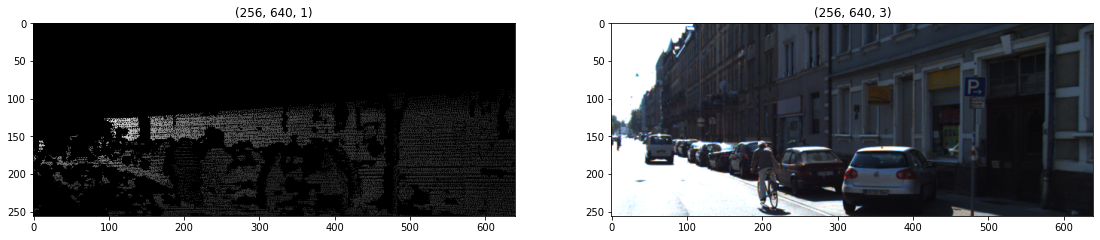

In [11]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.figure(figsize=(19,10))
    plt.subplot(1,2,1)
    plt.title(depth[i].shape)
    plt.imshow(depth[i], cmap='gray')
    plt.subplot(1,2,2)
    plt.title(images[i].shape)
    plt.imshow(images[i])

# Results

In [12]:
#kitti
from models.TCSVT import *
from utils import loss_function, accuracy_function
import kitti_loader as kloader
keras.backend.clear_session()

test = kloader.generate_dataframe("./splits/kitti_test.csv", "val")

keras.backend.clear_session()
custom_func = {"loss_function": loss_function, "accuracy_function": accuracy_function, "DownSampling": DownSampling, "UpSampling": UpSampling, "Scene_Understanding": Scene_Understanding }
model = tf.keras.models.load_model('./networks/unet-optimized-kitti2.h5', custom_objects=custom_func)

/data/awong189/miniconda/envs/tensorflow/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.5.0 and strictly below 2.8.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.4.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `

In [46]:
import numpy as np

i = 3
pred = model.predict(np.expand_dims(images[i], axis=0))

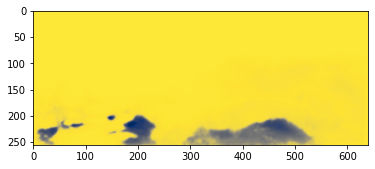

In [47]:
import matplotlib.pyplot as plt
plt.imshow(np.squeeze(pred), cmap='cividis_r')

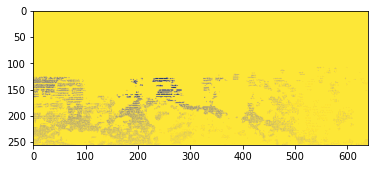

In [48]:
plt.imshow(np.squeeze(depth[i]), cmap='cividis_r')

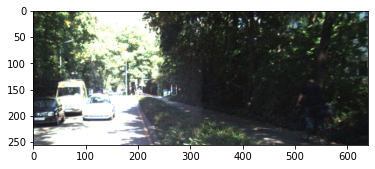

In [49]:
plt.imshow(np.squeeze(images[i]), cmap='gray')